Import the Libraries

In [1]:
import pandas as pd
import numpy as np


# Data Preparing

In [2]:
# Load the file
a=pd.read_csv('netflix_titles.csv')

In [3]:
# Top 5 Rows
a.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# sample five rows
a.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6589,s6590,Movie,Defying the Nazis: The Sharps' War,"Ken Burns, Artemis Joukowsky","Tom Hanks, Marina Goldman",United States,"May 1, 2017",2016,TV-14,79 min,Documentaries,This film documents the story of minister Wait...
4374,s4375,Movie,Sabrina,Rocky Soraya,"Luna Maya, Christian Sugiono, Sara Wijayanto, ...",Indonesia,"November 20, 2018",2018,TV-MA,114 min,"Horror Movies, International Movies",A toy manufacturer and his wife are terrorized...
1510,s1511,Movie,The Con Is On,James Haslam,"Uma Thurman, Tim Roth, Alice Eve, Parker Posey...","United States, United Kingdom","December 21, 2020",2018,R,95 min,Comedies,Two wedded partners-in-crime flee from their m...
2366,s2367,Movie,Alexandria: Again and Forever,Youssef Chahine,"Youssef Chahine, Yousra, Hussein Fahmy, Amr Ab...","France, Egypt","June 18, 2020",1989,TV-MA,109 min,"Classic Movies, Dramas, International Movies","At the peak of his career, Yehia joins a hunge..."
1389,s1390,Movie,Friendsgiving,Nicol Paone,"Malin Akerman, Kat Dennings, Aisha Tyler, Jane...",United States,"January 21, 2021",2020,R,95 min,Comedies,A quiet holiday dinner among friends turns int...


In [5]:
# total No. of Rows And Columns
b=a.shape
print('Number of Rows',b[0])
print('Number of Columns',b[1])

Number of Rows 8807
Number of Columns 12


In [6]:
# Information about the dataset
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# count the null values
a.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
# checking duplicate value

a.duplicated().sum()

0

# Data Cleaning


* Drop Show_id and Date_added because both columns don't give me insights for my analysis

* Drop Director Id because there are  total 2634 null value present in the dataset



In [9]:
# drop the columns
a.drop(['show_id','date_added','director'],axis=1,inplace=True)


In [10]:
# remove null values
a=a.dropna()

In [11]:
#info about the dataset after data cleaning
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7299 entries, 1 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7299 non-null   object
 1   title         7299 non-null   object
 2   cast          7299 non-null   object
 3   country       7299 non-null   object
 4   release_year  7299 non-null   int64 
 5   rating        7299 non-null   object
 6   duration      7299 non-null   object
 7   listed_in     7299 non-null   object
 8   description   7299 non-null   object
dtypes: int64(1), object(8)
memory usage: 570.2+ KB


In [12]:
# copy the dataset
x=a.copy()

In [13]:
# write a csv
x.to_csv("Netflix_Cleaned.csv",index=False)

# Data Analysis

In [14]:
# Total count  Movie and Tv show
df1=x['type'].value_counts().reset_index().rename(columns={'index':'Type','type':'Total_count'})
df1

,Type,Total_count
0,Movie,5277
1,TV Show,2022


In [15]:
# Total movies and tv show in each year
df2=x['release_year'].value_counts().reset_index().rename(columns={'index':'Release_year','release_year':'Total_count'})
df2

,Release_year,Total_count
0,2018,936
1,2017,862
2,2019,822
3,2016,752
4,2020,744
...,...,...
67,1961,1
68,1945,1
69,1966,1
70,1959,1


In [16]:
# Total movies and tv show in each country
df3=x['country'].value_counts().reset_index().rename(columns={'index':'Country','country':'Total_count'})
df33=df3.head(5)
df33

,Country,Total_count
0,United States,2485
1,India,940
2,United Kingdom,351
3,Japan,239
4,South Korea,196


In [17]:
# Total ratings
df4=x['rating'].value_counts().reset_index().rename(columns={'index':'Rating','rating':'total_count'})
df4

,Rating,total_count
0,TV-MA,2659
1,TV-14,1758
2,R,779
3,TV-PG,655
4,PG-13,470
5,PG,275
6,TV-Y7,223
7,TV-Y,209
8,TV-G,158
9,NR,63


# Exploratory Data Analysis

In [18]:
import matplotlib.pyplot as plt


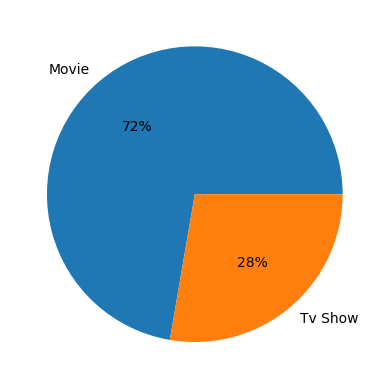

In [19]:
plt.pie(df1['Total_count'],labels=['Movie','Tv Show'], autopct='%.0f%%')
plt.show()

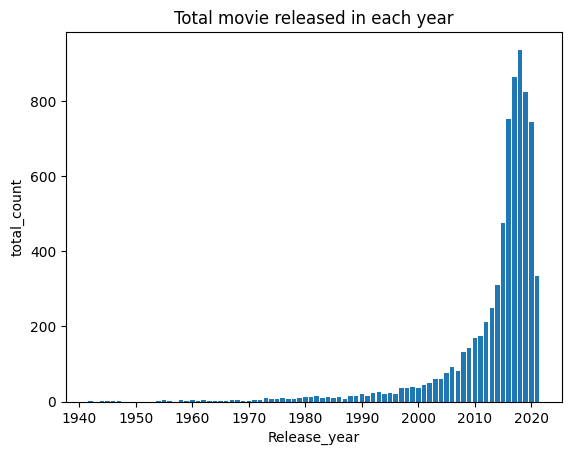

In [20]:
plt.title("Total movie released in each year")
plt.bar(df2['Release_year'], df2['Total_count'])
plt.xlabel('Release_year')
plt.ylabel("total_count")
plt.show()

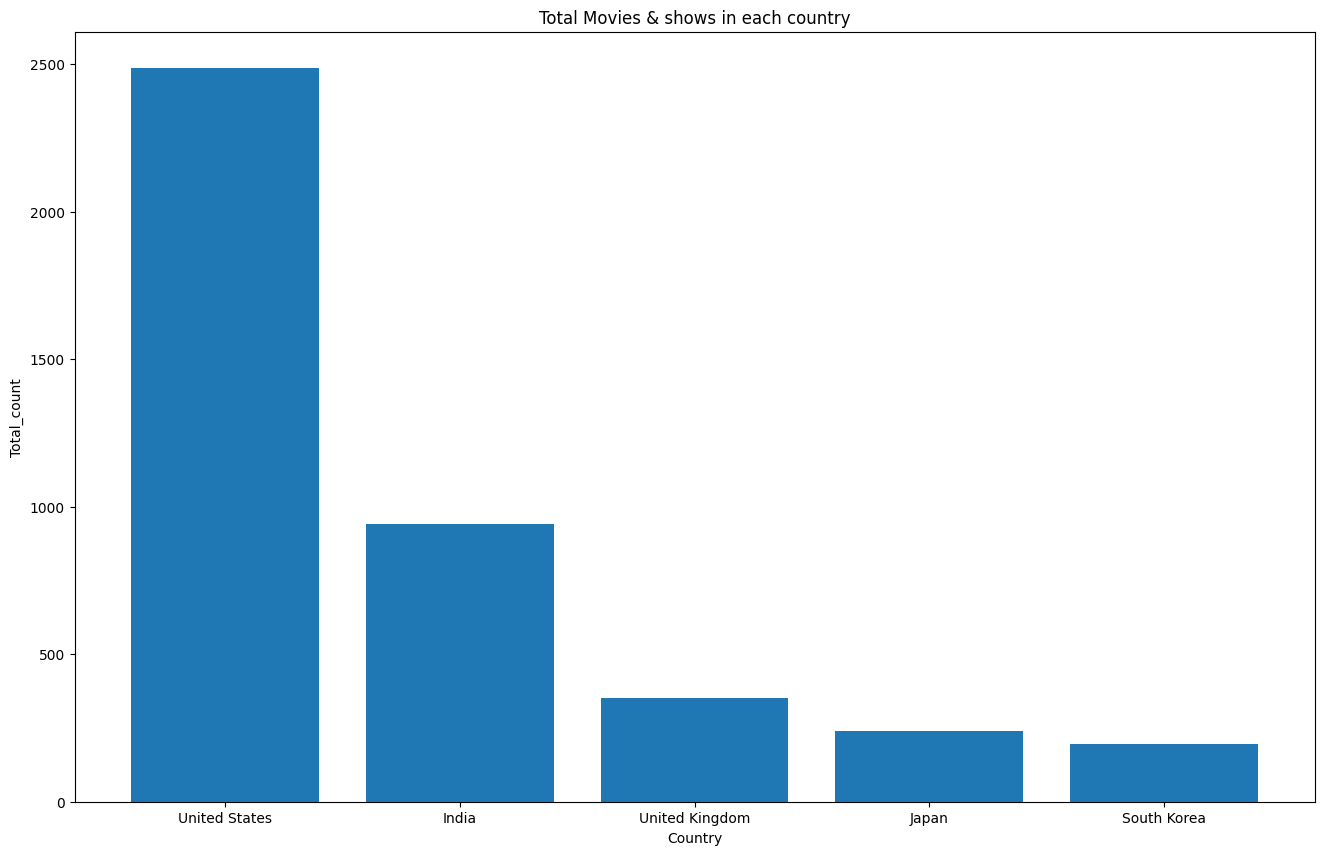

In [21]:
plt.figure(figsize=(16,10))
plt.title("Total Movies & shows in each country")
plt.bar(df33['Country'], df33['Total_count'])
plt.xlabel('Country')
plt.ylabel("Total_count")
plt.show()

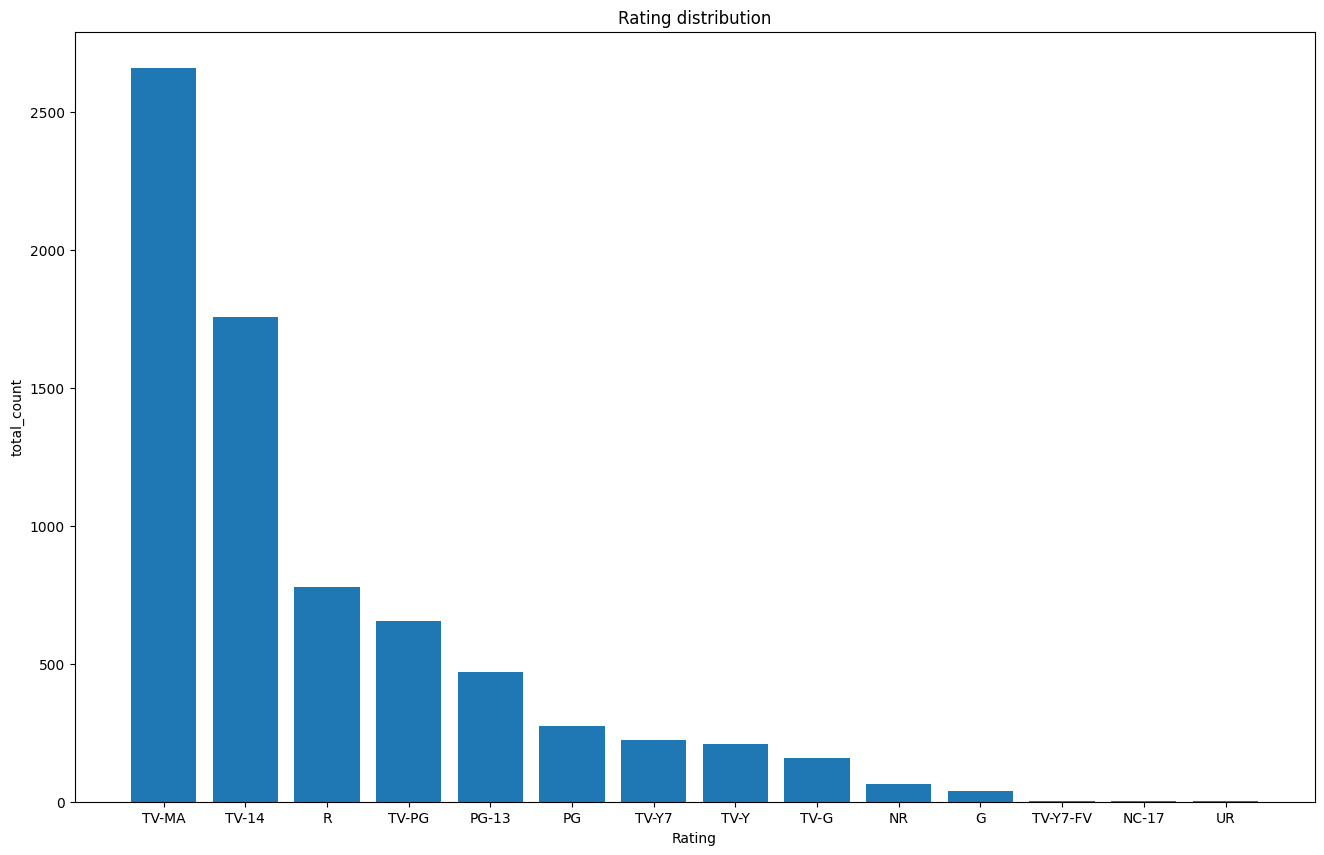

In [22]:
plt.figure(figsize=(16,10))
plt.title("Rating distribution")
plt.bar(df4['Rating'], df4['total_count'])
plt.xlabel('Rating')
plt.ylabel("total_count")
plt.show()

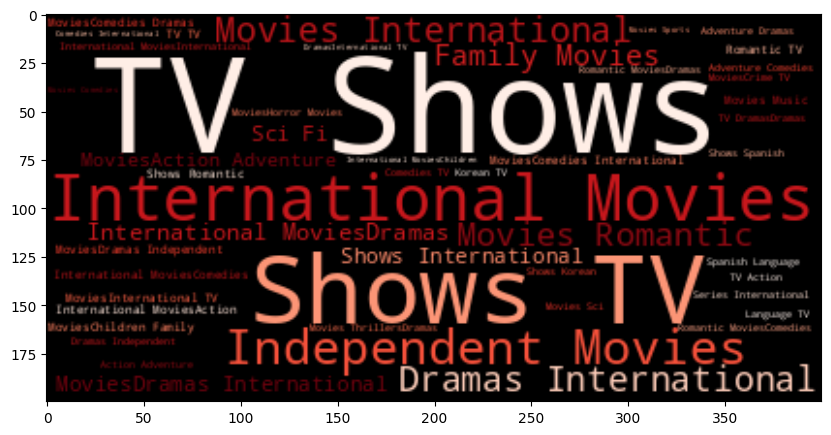

In [23]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
x1=x['listed_in'].values
y="".join(x1)
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(y)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

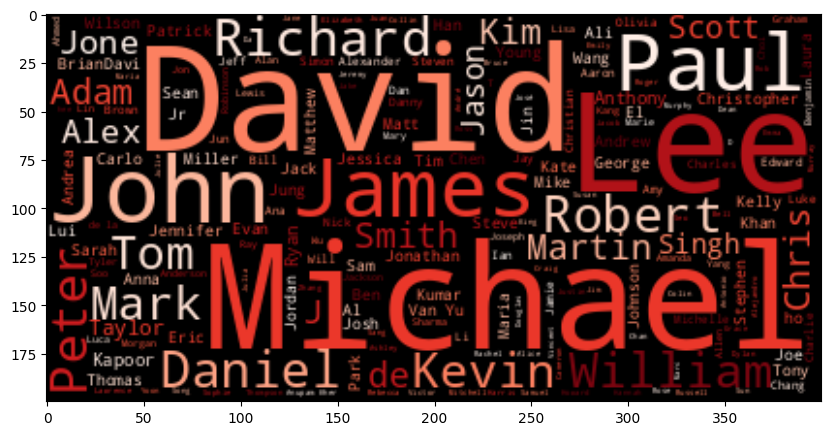

In [24]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
x2=x['cast'].values
y="".join(x2)
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(y)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

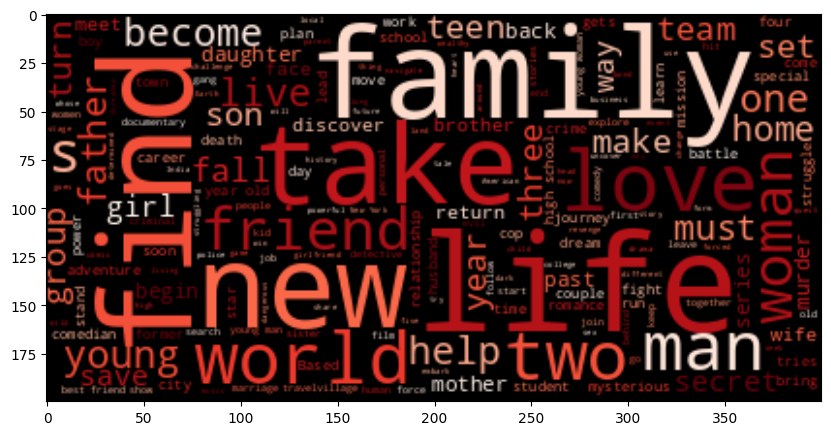

In [25]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
x3=x['description'].values
y="".join(x3)
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(y)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()